In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train=(x_train-0.00)/(255.00-0.00)
x_test=(x_test-0.00)/(255.00-0.00)
x_train.min(),x_train.max()

(0.0, 1.0)

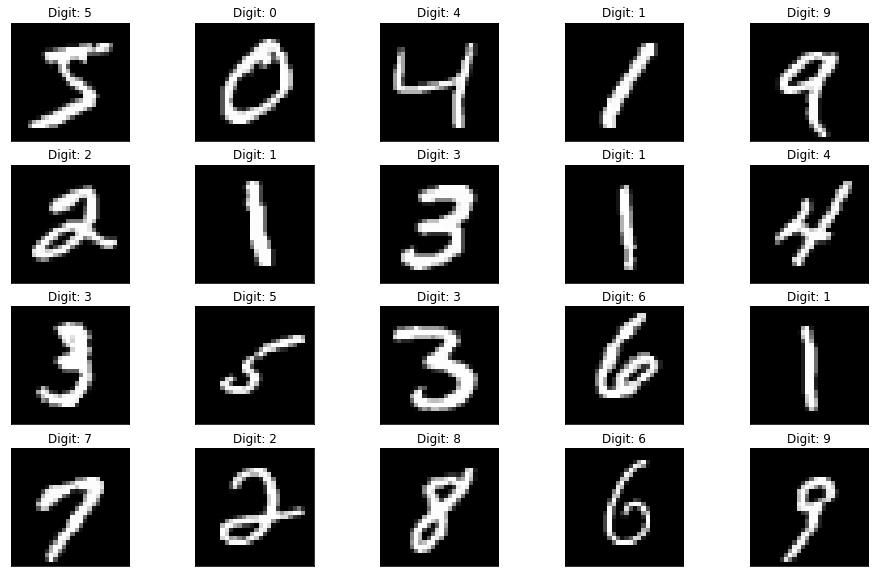

In [5]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray')) #creates an image from 2D array
    plt.title(f"Digit: {digit}")
    plt.xticks([])#markers denoting tick point on x axes
    plt.yticks([])#markers denoting tick point on y axes


plt.figure(figsize=(16, 10))
for i in range(20):
    plot_digit(x_train[i], y_train[i], plt, i)
    
plt.show()

In [6]:
#Our Data is 3D dimensional but we need one more dimension, so we add that extra dimension and that is one
x_train=x_train.reshape((x_train.shape+(1,)))
x_test=x_test.reshape((x_test.shape+(1,)))

In [10]:
#building the model
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100,activation='relu'),
    Dense(10,activation='softmax')
])

In [15]:
optimizer=SGD(learning_rate=0.01,momentum=0.9)
model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [17]:
model.fit(x_train,y_train,epochs=20,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5796e-04 - accuracy: 1.0000 - val_loss: 0.0545 - val_accuracy: 0.9886
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5057e-04 - accuracy: 1.0000 - val_loss: 0.0546 - val_accuracy: 0.9886
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4301e-04 - accuracy: 1.0000 - val_loss: 0.0553 - val_accuracy: 0.9885
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3694e-04 - accuracy: 1.0000 - val_loss: 0.0554 - val_accuracy: 0.9884
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3040e-04 - accuracy: 1.0000 - val_loss: 0.0556 - val_accuracy: 0.9887
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2408e-04 - accuracy: 1.0000 - val_loss: 0.0559 - val_accuracy: 0.9886
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1878e-04 - accuracy: 1.0000 - val_

1/1 [==============================] - 0s 23ms/step


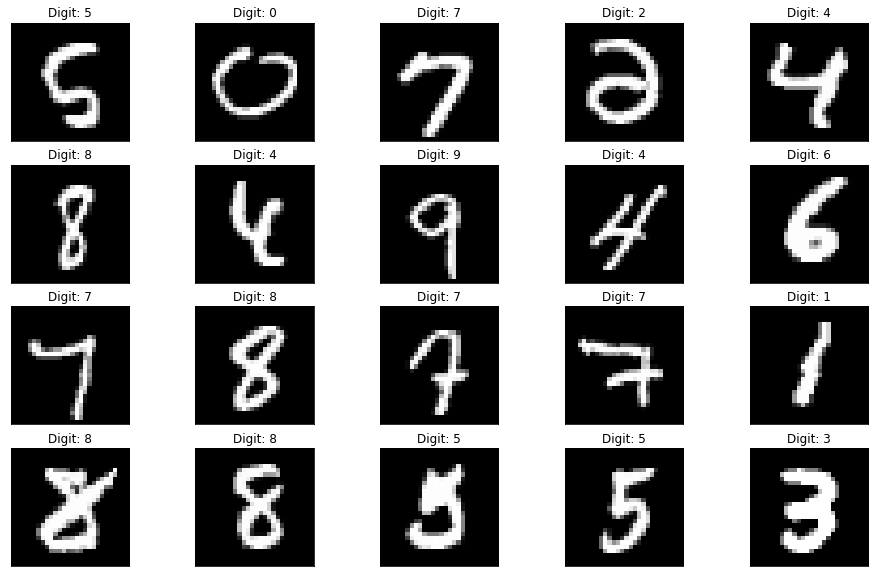

In [19]:
plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(x_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    plot_digit(image, digit, plt, i)

plt.show()


In [20]:
predictions = np.argmax(model.predict(x_test), axis=-1)
accuracy_score(y_test, predictions)

313/313 [==============================] - 1s 2ms/step


0.9885